# Классификация: логистическая регрессия 
**@ материалы взяты и адаптированы с mlcourse.ai**


разберем здесь два супер популярных подхода к решению задач классификации: логистическая регрессия (которая есть просто обобщение линейной модели) и метод из класса "ядерных" методов, на который можно смотреть еще как на примитивную нейронную сеть: Support Vector Machine. Последний может использоваться как для классификации, так и для регрессии (support vector regression) 

## Логистическая регрессия

Основная идея -  признаковое пространство может быть разделено гиперплоскостью на две полуплоскости, в каждой из которых прогнозируется одно из двух значений целевого класса. 
Если это можно сделать без ошибок, то обучающая выборка называется *линейно разделимой*. При хорошем раскладе мы и задачу классификации можем решить с помощью знакомой уже нам линейной регрессии

<img src="https://drek4537l1klr.cloudfront.net/orland/v-11/Figures/15image015.png">

Мы уже знакомы с линейной регрессией и методом наименьших квадратов. Рассмотрим задачу бинарной классификации, причем метки целевого класса обозначим "+1" (положительные примеры) и "-1" (отрицательные примеры).
Один из самых простых линейных классификаторов получается на основе регрессии вот таким образом:

$$a(X) = \text{sign} (W^T X)$$

где
 - $\textbf{x}$ – вектор признаков примера (вместе с единицей);
 - $\textbf{w}$ – веса в линейной модели (вместе со смещением $w_0$);
 - $\text{sign}(\bullet)$ – функция "сигнум", возвращающая знак своего аргумента;
 - $a(\textbf{x})$ – ответ классификатора на примере $\textbf{x}$.
 
 
Почему так?
$\textbf{w}^{\text{T}}\textbf x = 0$ задает уравнение гиперплоскости,  в результате чего все значения признаков будут лежать с одной или другой стороны, а формально знак у уравнения $\textbf{w}^{\text{T}}\textbf x$ будет определять положение, если мы умудрились провести гиперплоскость таким образом, что разделили группу - то все хорошо, задача решена. 


Логистическая регрессия (а мы смотрели уже на нее как на обобщение линейной модели, в которой данные получаются из биномиального распределения) является частным случаем линейного классификатора, но она обладает хорошим "умением" – прогнозировать вероятность $p_+$ отнесения примера $\textbf{x}_\text{i}$ к классу "+":
$$p = P(y_i = 1 \mid x_i, W) $$


Прогнозирование не просто ответа ("+1" или "-1"), а именно *вероятности* отнесения к классу "+1" во многих задачах является очень важным требованием. Например, в задаче кредитного скоринга, где традиционно применяется логистическая регрессия, часто прогнозируют вероятность невозврата кредита ($p_+$). Клиентов, обратившихся за кредитом, сортируют по этой предсказанной вероятности (по убыванию), и получается скоркарта — по сути, рейтинг клиентов от плохих к хорошим. В задачах медицинской диагностики, в актуарных задачах, в общем во всех задачах где надо оценивать риски


**Итак**:
 - хотим прогнозировать вероятность $p_+ \in [0,1]$
 - умеем строить линейный прогноз  $b(\textbf{x}) = \textbf{w}^\text{T} \textbf{x} \in \mathbb{R}$.
 
 
_Каким образом преобразовать полученное значение в вероятность, пределы которой – [0, 1]?_ 
 
Для этого нужна некоторая функция $f: \mathbb{R} \rightarrow [0,1]$, которая умеет переводить неограниченный массив данных в единичный интервал. В модели логистической регрессии для этого берется конкретная функция: $$\sigma(z) = \frac{1}{1 + \exp^{-z}}$$. 

Почему? Если посмотреть на это с точки зрения обобщенных линейных линейных моделей и на принцип максимального правдоподобия, то:


$$p(y;\theta) = \theta^y(1-\theta)^{1-y}$$

Вспомним про семейство экспоненциальных распределений, где $\eta = W^Tx$:

$$p(y;\eta) = b(y) \exp (\eta^T T(y) - a(\eta))$$

Как привести к экспоненциальному виду?

$$p(y;\theta) = \exp(\log\frac{\theta}{1-\theta}y+\log(1-\theta))$$

$$\frac{\theta}{1-\theta} = W^TX \Rightarrow \theta = \frac{1}{1+\exp(-W^TX)} = g(W^TX)$$ 

$$E(y;W^TX) = \theta  = g(W^TX)$$
$g(a)$ - это логистическая функция, еще известная как сигмоида, она умеет превращать естественную ось в диапазон 

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
def sigma(z):
    return 1. / (1 + np.exp(-z))

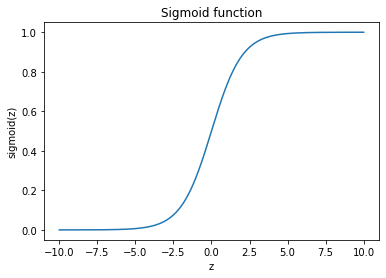

In [3]:
xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigma(x) for x in xx]);
plt.xlabel('z');
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid function');

Если $\theta(X)$ - вероятность происходящего события $X$. Тогда то отношение, которое мы увидели, $$OR(X) = \frac{\theta(X)}{1-\theta(X)}$$
это отношение вероятностей того, произойдет ли событие или не произойдет. Очевидно, что вероятность и отношение шансов содержат одинаковую информацию. Но в то время как $P(X)$ находится в пределах от 0 до 1, $OR(X)$ находится в пределах от 0 до $\infty$,  а логарифм этой величины будет уже принимать значения на всех вещественной оси

## Функция потерь для логистической регрессии

Задачу из курса линейной алгебры: найти расстояние от точки с радиус-вектором $x_A$ до плоскости, которая задается уравнением $W^TX = 0.$


Ответ: 
$\rho = \frac{W^Tx_A}{||W||}$


То есть, что чем больше по модулю выражение $W^Tx_i$, тем дальше точка $\textbf{x}_\text{i}$ находится от плоскости $\textbf{w}^{\text{T}}\textbf{x} = 0.$

Значит, выражение $M(\textbf{x}_\text{i}) = y_i\textbf{w}^{\text{T}}\textbf{x}_\text{i}$ – это своего рода "уверенность" модели в классификации объекта $\textbf{x}_\text{i}$.

То есть мы хотим, чтобы для всех примеров этот отступ был как можно большим

$$L( X, y, W) = \sum_{i=1}^{\ell} \log (1 + \exp(-y_iW^Tx_i))$$
Что соответствует максимуму правдоподобия
$$\sum_{i=1}^{\ell} \log (1 + \exp(-y_iW^Tx_i)) = -\sum_{i=1}^{\ell} \log\frac{1}{(1 + \exp(-y_iW^Tx_i))}$$

## Регуляризация

Здесь все так же как и в линейной модели, мы можем добавить ограничение на модуль ( L1), квадрат (L2)  весов  или их комбинацию (Elastic net)

$$L( X, y, W) = \sum_{i=1}^{\ell} \log (1 + \exp(-y_iW^Tx_i))+ \alpha |W|$$

$$L( X, y, W) = \sum_{i=1}^{\ell} \log (1 + \exp(-y_iW^Tx_i))+ \alpha W^2$$

$$L( X, y, W) = \sum_{i=1}^{\ell} \log (1 + \exp(-y_iW^Tx_i))+ \alpha W^2$$

$$L( X, y, W) = \sum_{i=1}^{\ell} \log (1 + \exp(-y_iW^Tx_i))+ \beta(\alpha |W| +(1-\alpha) W^2)$$

В sklearn  $C$ – коэффициент, обратный коэффициент регуляризации)

## Метрика качества

С случае с задачей классификацией с метриками качества отдельная история. Самая простая и на текущий момент мы ею ограничимся - эта доля правильно угаданных ответов, или точность (accuracy), она может меняться в пределах от 0 до 1 


In [4]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV

В этом наборе данных для 118 микрочипов (объекты) указаны результаты двух тестов по контролю качества (два числовых признака) и сказано, пустили ли микрочип в производство. Признаки уже центрированы, то есть из всех значений вычтены средние по столбцам. Таким образом, "среднему" микрочипу соответствуют нулевые значения результатов тестов.  

In [5]:
df_chip = pd.read_csv('datasets/microchip_tests.txt',
                   header=None, names = ('test1','test2','released'))
# информация о наборе данных
df_chip.head()

,test1,test2,released
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


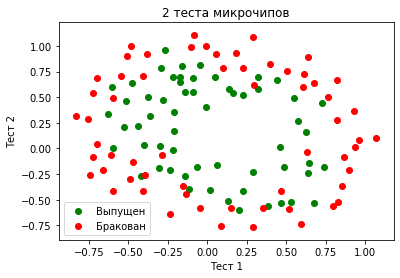

In [6]:
plt.scatter(df_chip.loc[df_chip.released == 1, 'test1'], df_chip.loc[df_chip.released == 1, 'test2'], c='green', label='Выпущен')
plt.scatter(df_chip.loc[df_chip.released == 0, 'test1'], df_chip.loc[df_chip.released == 0, 'test2'], c='red', label='Бракован')
plt.xlabel("Тест 1")
plt.ylabel("Тест 2")
plt.title('2 теста микрочипов')
plt.legend();

In [7]:
X = df_chip.iloc[:,:2].values
y = df_chip.iloc[:,2].values

In [8]:
C = 1e-2
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
logit.fit(X, y)
print(f'Доля правильно предсказанных  образцов: {logit.score(X, y).round(2)}')
print(logit.coef_, logit.intercept_)

Доля правильно предсказанных  образцов: 0.51
[[-0.02015372  0.00141637]] [-0.03305778]


In [11]:
def plot_boarders(X,y, clf, thres = 0.51,  grid_step=.01):
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, grid_step),
                         np.arange(y_min, y_max, grid_step))


    # каждой точке в сетке [x_min, m_max]x[y_min, y_max]
    # ставим в соответствие свой цвет
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = 1*(clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,0]>thres)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(df_chip.loc[df_chip.released == 1, 'test1'], df_chip.loc[df_chip.released == 1, 'test2'], c='green', label='Выпущен')
    plt.scatter(df_chip.loc[df_chip.released == 0, 'test1'], df_chip.loc[df_chip.released == 0, 'test2'], c='red', label='Бракован')
    plt.xlabel("Тест 1")
    plt.ylabel("Тест 2")
    plt.title('2 теста микрочипов')
    plt.legend();

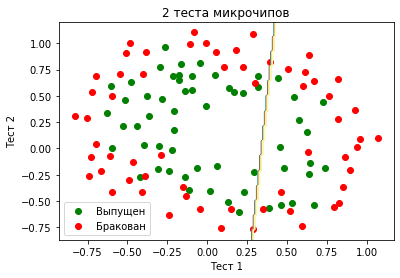

In [12]:
plot_boarders(X,y, logit, thres = 0.51)

Ничего не получилось? Попробуем добавить полиномиальных признаков

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
poly = PolynomialFeatures(degree=7)
logit = LogisticRegression(C=C, n_jobs=-1, random_state=17)
poly_logit = Pipeline([('poly', poly), ('logit', logit)])

Доля правильных ответов классификатора( degree=4,C=0.01) на обучающей выборке: 0.619
Сумма весов логистической регрессии 0.29789660978371646


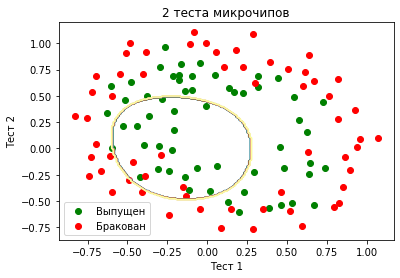

In [16]:
max_deg = 4
C = 0.01
poly_logit.set_params(poly__degree=max_deg, logit__C=C).fit(X, y)
plot_boarders(X,y, poly_logit, thres = 0.5)

print(f"Доля правильных ответов классификатора( degree={max_deg},C={C}) на обучающей выборке:", 
      round(poly_logit.score(X, y), 3))
print(f"Сумма весов логистической регрессии {np.sum(np.abs(poly_logit['logit'].coef_))}")

Доля правильных ответов классификатора( degree=4,C=10) на обучающей выборке: 0.839
Сумма весов логистической регрессии 31.793098188306303


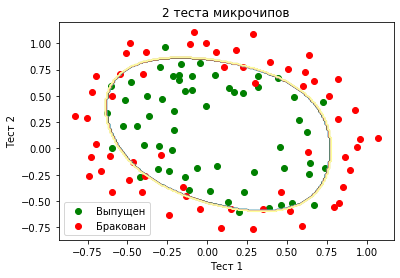

In [17]:
max_deg = 4
C = 10
poly_logit.set_params(poly__degree=max_deg, logit__C=C).fit(X, y)
plot_boarders(X,y, poly_logit, thres = 0.5)

print(f"Доля правильных ответов классификатора( degree={max_deg},C={C}) на обучающей выборке:", 
      round(poly_logit.score(X, y), 3))
print(f"Сумма весов логистической регрессии {np.sum(np.abs(poly_logit['logit'].coef_))}")

Доля правильных ответов классификатора( degree=5,C=10000) на обучающей выборке: 0.873
Сумма весов логистической регрессии 267.34587789607014


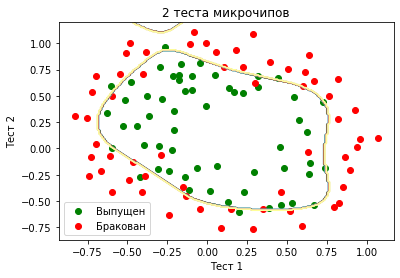

In [18]:
max_deg = 5
C = 10000
poly_logit.set_params(poly__degree=max_deg, logit__C=C).fit(X, y)
plot_boarders(X,y, poly_logit, thres = 0.5)

print(f"Доля правильных ответов классификатора( degree={max_deg},C={C}) на обучающей выборке:", 
      round(poly_logit.score(X, y), 3))
print(f"Сумма весов логистической регрессии {np.sum(np.abs(poly_logit['logit'].coef_))}")

# Оценка качества обучения: валидационные кривые и кривые обучения
Мы уже получили представление о проверке модели, кросс-валидации и регуляризации.
Теперь рассмотрим главный вопрос:

**Если качество модели нас не устраивает, что делать?**

- Сделать модель сложнее или упростить?
- Добавить больше признаков?
- Или нам просто нужно больше данных для обучения?

Ответы на данные вопросы не всегда лежат на поверхности.  В частности, иногда использование более сложной модели приведет к ухудшению показателей. Либо добавление наблюдений не приведет к ощутимым изменениям. Способность принять правильное решение и выбрать правильный способ улучшения модели, собственно говоря, и отличает хорошего специалиста от плохого.

Как правило с моделями могут быть две проблемы:
 -  Mодель **недообучилась**: то есть она не имеет достаточное кол-во параметров.

 - Модель **переобучилась**: когда параметров слишком много либо не хватает регуляризации, алгоритм может "отвлекаться" на шум в данных и упускать основной тренд.
 
 Смотрят на то как происходит "обучение модели" обычно по так называемым кривым обучения 


In [19]:
from sklearn.model_selection import validation_curve

In [20]:
Cs = np.logspace(-2, 1, 30)
val_train, val_test = validation_curve(poly_logit, X, y,
                                       'logit__C', Cs, cv=5)

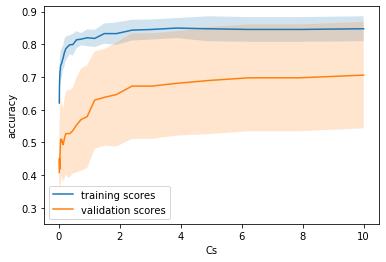

In [21]:
def plot_with_err(x, data, **kwargs):
    mu, std = data.mean(1), data.std(1)
    lines = plt.plot(x, mu, '-', **kwargs)
    plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                     facecolor=lines[0].get_color(), alpha=0.2)

plot_with_err(Cs, val_train, label='training scores')
plot_with_err(Cs, val_test, label='validation scores')
plt.xlabel('Cs'); plt.ylabel('accuracy')
plt.legend();

### Сколько нужно данных?

Известно, что чем больше данных использует модель, тем лучше. Но как нам понять в конкретной ситуации, помогут ли новые данные? Скажем, целесообразно ли нам потратить  время и деньги на то, чтобы увеличить выборку?

Поскольку новых данных пока может и не быть, разумно поварьировать размер имеющейся обучающей выборки и посмотреть, как качество решения задачи зависит от объема данных, на которм мы обучали модель. Так получаются **кривые обучения** (**learning curves**).

Идея простая: мы отображаем ошибку как функцию от количества примеров, используемых для обучения. При этом параметры модели фиксируются заранее.

In [22]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(degree=5, C=10):
    train_sizes = np.linspace(0.01, 1, 20)
    poly_logit.set_params(poly__degree=degree, logit__C=C)
    N_train, val_train, val_test = learning_curve(poly_logit,
                                                  X, y, train_sizes=train_sizes, cv=5,
                                                  scoring='accuracy')
    plot_with_err(N_train, val_train, label='training scores')
    plot_with_err(N_train, val_test, label='validation scores')
    plt.xlabel('Training Set Size'); plt.ylabel('Acc')
    plt.legend()

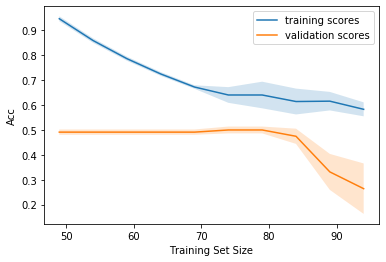

In [23]:
plot_learning_curve(degree=1, C=0.1)

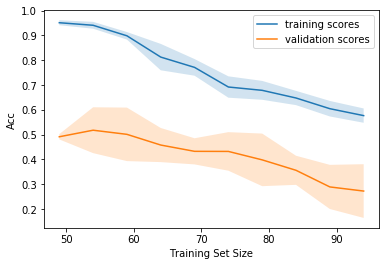

In [24]:
plot_learning_curve(degree=1, C=10)

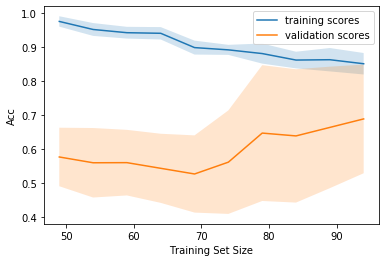

In [25]:
plot_learning_curve(degree=7, C=10)

Типичная ситуация: для небольшого объема данных ошибки на обучающей выборке и в процессе кросс-валидации довольно сильно отличаются, что указывает на переобучение.  Для той же модели, но с большим объемом данных ошибки "сходятся", что указывается на недообучение.

Если добавить еще данные, ошибка на обучающей выборке не будет расти, но с другой стороны, ошибка на тестовых данных не будет уменьшаться. 

Получается, ошибки "сошлись", и добавление новых данных не поможет. Собственно, это случай – тот к которому нужно стремиться. Возможна ситуация, когда мы увеличиваем выборку в 10 раз. Но если не менять сложность модели, это может и не помочь. То есть стратегия "настроил один раз – дальше использую 10 раз" может и не работать. 

Что будет, если изменить коэффициент регуляризации?
Видим хорошую тенденцию – кривые постепенно сходятся, и если дальше двигаться направо (добавлять в модель данные), можно еще повысить качество на валидации. 

## Выводы

- Ошибка на обучающей выборке сама по себе ничего не говорит о качестве модели
- Кросс-валидационная ошибка показывает, насколько хорошо модель подстраивается под данные (имеющийся тренд в данных), сохраняя при этом способность обобщения на новые данные
- **Валидационная кривая** представляют собой график, показывающий результат на тренировочной и валидационной выборке в зависимости от **сложности модели**:
  + если две кривые распологаются близко, и обе ошибки велики, -  это признак *недообучения*
  + если две кривые далеко друг от друга, - это показатель *переобучения*
- **Кривая обучения**  - это график, показывающий результаты на валидации и тренировочной подвыборке в зависимости от количества наблюдений. 
  + если кривые сошлись друг к другу, добавление новых данных не поможет – надо менять сложность модели 
  + если кривые еще не сошлись, добавление новых данных может улучшить результат.

## Support vector machine

https://www.csd.uwo.ca/~oveksler/Courses/CS434a_541a/Lecture11.pdf

### XOR-проблема
Рассмотрим еще пример, где линейные модели справляются хуже. 

Линейные методы классификации строят все же очень простую разделяющую поверхность – гиперплоскость. Самый известный игрушечный пример, в котором классы нельзя без ошибок поделить гиперплоскостью (то есть прямой, если это 2D), получил имя "the XOR problem".

XOR – это "исключающее ИЛИ"
XOR дал имя простой задаче бинарной классификации, в которой классы представлены вытянутыми по диагоналям и пересекающимися облаками точек. 

In [26]:
X = np.random.randn(300, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

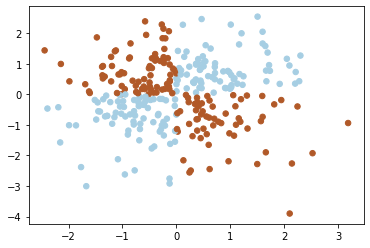

In [27]:
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired);

In [61]:
def plot_boundary(clf, X, y, plot_title, svm = False):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
    clf.fit(X, y)
    # plot the decision function for each datapoint on the grid
    if svm:
        Z = clf.decision_function(np.vstack((xx.ravel(), yy.ravel())).T)
    else:    
        Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1]
    Z = Z.reshape(xx.shape)

    image = plt.imshow(Z, interpolation='nearest',
                           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
                           aspect='auto', origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                               linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.xticks(())
    plt.yticks(())
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    plt.title(plot_title, fontsize=12);
    return clf

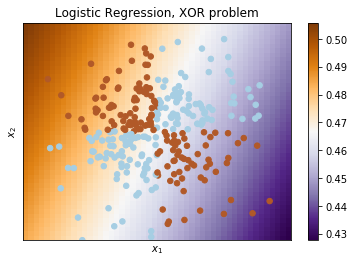

In [31]:
logit = LogisticRegression()
plot_boundary(logit,X,y, "Logistic Regression, XOR problem")

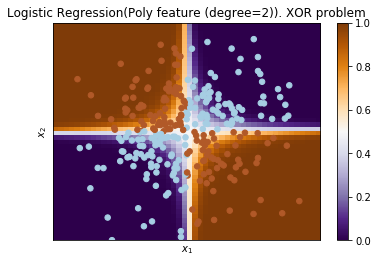

In [32]:
poly_logit.set_params(poly__degree=2, logit__C=1)
plot_boundary(poly_logit, X, y,
              "Logistic Regression(Poly feature (degree=2)). XOR problem")

На практике полиномиальные признаки действительно помогают, но строить их явно – вычислительно неэффективно. Особенно когда у вас большое количество признаков.  Гораздо быстрее работают так называемые ядерные методы. При таком подходе в пространстве высокой размерности считается только расстояние между объектами (задаваемое функцией-ядром), а явно плодить комбинаторно большое число признаков не приходится.  Один из лучших алгоритмов, который работает "из коробки"   - SVM алгоритм. Был предложен нашими математиками, Владимиром Вапником и Червонкинсоном в 1963 году. 

Полиномиальные признаки мы можем собрать в функцию $\phi(x)  = {1,x_1,x_1^2,x_1x_2, x_2^2}$  (feature map)

А дальше можно показать, что при решении оптимизационной задачи нам достаточно вычислить скалярные произведения или расстояния  $<\phi(x_i)\phi(x_j)>$ а сами признаки вычислять не нужно. Оказывается, что вычисление таких расстояний гораздо эффективней. В том случае, когда мы считаем обычное расстояние  - это линейное ядро.
- Радиальные базисные функции: 
    $\phi(x_i, x_j) = e^{-(||x_i - x_j||)^{2}/w}$ где $w$ свободный параметр, а $x_i, x_j$ признаки 

- Полиномиальная функция: $\phi(x_i, x_j) = (x_i \cdot x_j + b)^n$, где $x_i, x_j$ - признаки, $b$  - свободный параметр, и $n$ степень полинома

Еще этот алгоритм называют алгоритмом с максимальным зазором

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/600px-SVM_margin.png" style="width: 300px;">



Преимущество SVM заключается еще в том, что алгоритм строит границу между классами таким образом, что максимизирует зазор, разделяющий эти два класса. Зазор (margin)
$$ \text{Margin} = \frac {2}{\sqrt{(w \cdot w)}} $$

Чем больше маржа, тем больше разделения между двумя классами и тем больше вероятность, что модель правильно предсказывает метки невидимых данных. Этот запас - это расстояние от ближайшей точки положительного класса до границы решения + расстояние между ближайшей точкой отрицательного класса к границе. Это дает нам <i> наибольший запас </i> гиперплоскости.

Тоже есть параметр регуляризации  - $C$, обратно пропорциональный силе регуляризации. 

Этот алгоритм может применяться как для классификации, так и для регрессии (https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR). Попробуйте этот алгоритм при решении задания с airbnb

In [36]:
from sklearn import svm

Accuracy of classifier: 0.5333333333333333


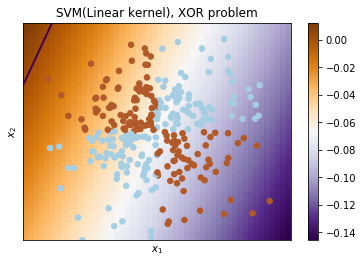

In [68]:
C = 1.0
lin_svm = svm.LinearSVC(C=C)
lin_svm = plot_boundary(lin_svm,X,y, "SVM(Linear kernel), XOR problem", svm = True)
print(f'Accuracy of classifier: {lin_svm.score(X,y)}')

Accuracy of classifier: 0.96


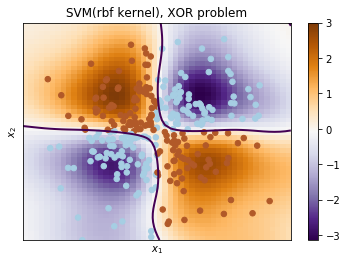

In [67]:
C = 1.0
rbf_svm = svm.SVC(kernel='rbf', gamma=0.7, C=C)
rbf_svm = plot_boundary(rbf_svm,X,y, "SVM(rbf kernel), XOR problem", svm = True)
print(f'Accuracy of classifier: {rbf_svm.score(X,y)}')

Accuracy of classifier: 0.98


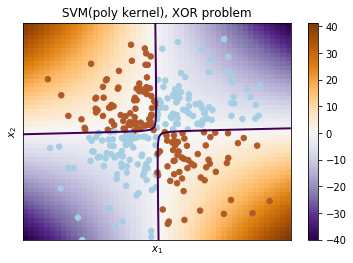

In [69]:
poly_svm = svm.SVC(kernel='poly', degree=2, gamma='auto', C=C)
poly_svm  = plot_boundary(poly_svm,X,y, "SVM(poly kernel), XOR problem", svm = True)
print(f'Accuracy of classifier: {poly_svm.score(X,y)}')

Accuracy of classifier: 0.7542372881355932


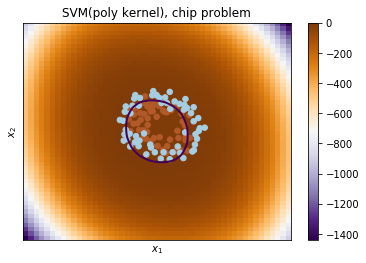

In [71]:
poly_svm = svm.SVC(kernel='poly', degree=4, C=1)
poly_svm = plot_boundary(poly_svm,df_chip.iloc[:,:2].values,df_chip.iloc[:,2].values, "SVM(poly kernel), chip problem", svm = True)
print(f'Accuracy of classifier: {poly_svm.score(df_chip.iloc[:,:2].values,df_chip.iloc[:,2].values)}')

Accuracy of classifier: 0.7542372881355932


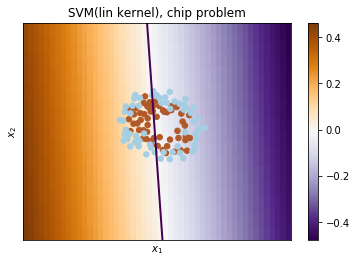

In [72]:
C = 1.0
lin_svm = svm.LinearSVC(C=C)
lin_svm  = plot_boundary(lin_svm,df_chip.iloc[:,:2].values,df_chip.iloc[:,2].values, "SVM(lin kernel), chip problem", svm = True)
print(f'Accuracy of classifier: {poly_svm.score(df_chip.iloc[:,:2].values,df_chip.iloc[:,2].values)}')

Accuracy of classifier: 0.8559322033898306


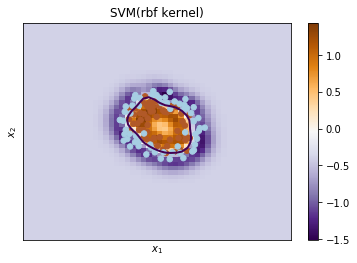

In [88]:
C = 1.0
rbf_svm = svm.SVC(kernel='rbf', gamma = 10, C = 1)
rbf_svm = plot_boundary(rbf_svm,df_chip.iloc[:,:2].values,df_chip.iloc[:,2].values, "SVM(rbf kernel)", svm = True)
print(f'Accuracy of classifier: {rbf_svm.score(df_chip.iloc[:,:2].values,df_chip.iloc[:,2].values)}')

In [ ]:
# Задание 2